## Coloring paths and graph isomorphism

Exexuting the code below builds a random graph. Then it colors the shortest path between
two nodes.  Read the comments carefully.  If you don't like the graph you're getting or the picture you're getting, try just re-executing the cell.  The results will be different because each time you execute
`nx.erdos_renyi_graph` you get a different random graph matching the specs you passed in
as arguments.  So if it says:

```
G = nx.erdos_renyi_graph(8,0.4)
```

You get a a graph with 8 nodes with a probability of .4 of having an adge between
any two randomly selected nodes.

To stick with a graph you like, you might also remove the comment `character` `#` from the `random.seed` line
and try different integer values for the argument (1,9 ,7).  Once you get a graph
you like stick with that seed value.  After that, 
you will get the same graph each time you execute the cell, although the details of the layout might differ
each time you execute it.

[0, 3]


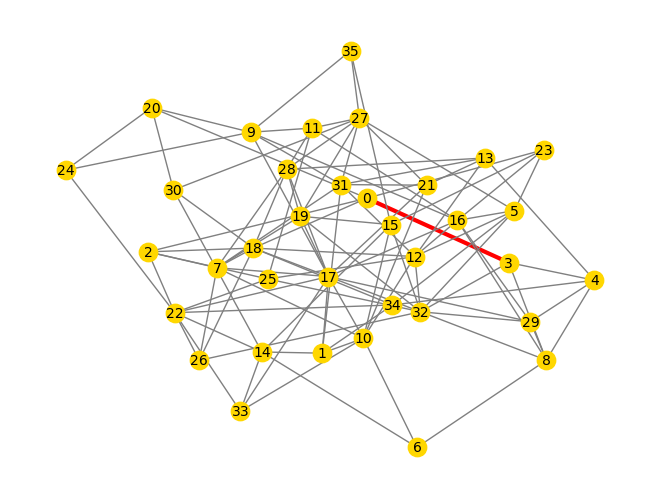

In [1]:
import numpy.random
import networkx as nx
# To stick with one random graph.
numpy.random.seed(5)
# To go back to changing randomly each time
# numpy.random.seed()
N,prob = 36,.15
G = nx.erdos_renyi_graph(N,prob)
# Find the shortest path from node 0 to node 3
p = nx.shortest_path(G,0,3)
print(p)
# Color all edges black for contrast with what's coming
for e in G.edges():
    G[e[0]][e[1]]['color'] = 'gray'
    G[e[0]][e[1]]['weight'] = 1
# color edges in the shortest path from 0 to 3 red
# p is a list of the nodes in the path.
# We're going to color each edge consisting of node in p
# and the next node in p blue, but we want to stop one
# node short of the end, because the last node in the
# path has no next node.  So we iterate through the
# list up to but not including the last member by `range` 
for i in range(len(p)-1):
    G[p[i]][p[i+1]]['color'] = 'red'
    G[p[i]][p[i+1]]['weight'] = 3
# Store in a list to use for drawing
#edge_color_list = [ G[e[0]][e[1]]['color'] for e in G.edges() ]
#  We pass nx.drawa list of colors exactly as long as the list of edges,
#  with the colors in exactly the order we want.  That is
# edge_color_list[i] has the color we want to assign to G.edges()[i].
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw(G,node_color = 'gold', node_size= 175, font_size= 10,
               edge_color = colors, width= weights, with_labels = True)
#plt.show()

Set the random seed in the next cell to what it was in the previous cell and execute it.
Note that although the length of the shortest paths between 0 and 3 varies when
we look at all random graphs of size N with edge probability p, it does not vary now.  Study the resulting graph to
make sure it is the same as it was in the previous cell, differing only in layout and edge
coloring.

Point:  What makes two graphs identical is that they have the same nodes and each
node has the same neighbors.  Any given graph has an infinite number of colorings and layouts
but it's still the same graph.

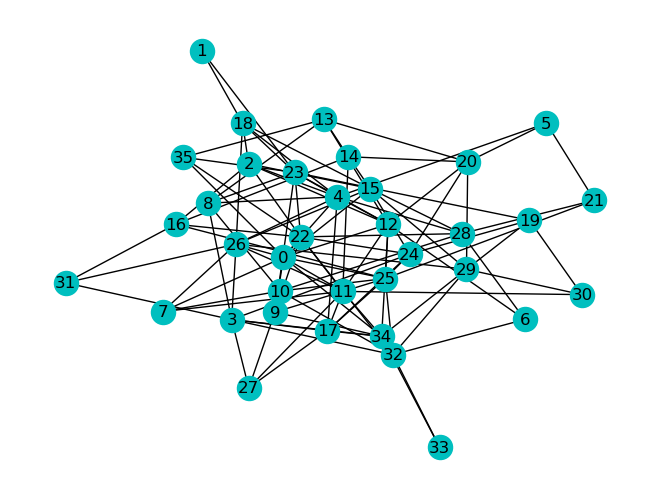

In [9]:
seed=7
numpy.random.seed(seed)
# To go back to 
#random.seed()
G = nx.erdos_renyi_graph(N,prob,seed=seed)
nx.draw(G, with_labels = True,node_color='c')

A more mathematical issue is that two graphs can be **isomorphic**.  They might have exactly the same structure
but have different names for the nodes.  To start with, note that `G.nodes()` produces a list of the nodes in ascending order.

In [10]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35))

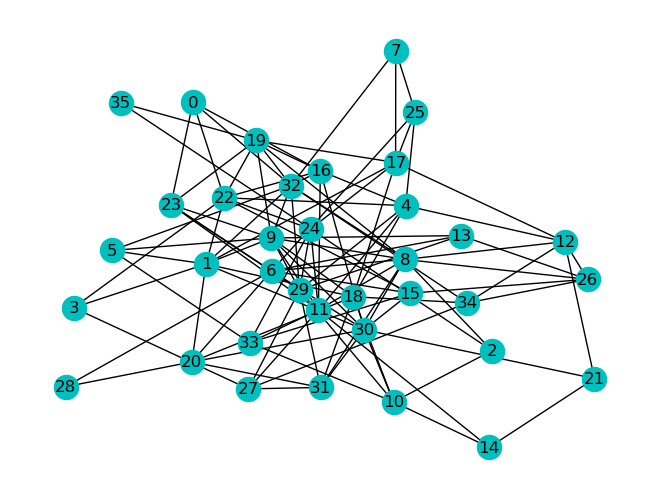

In [12]:
r = numpy.random.permutation(G.nodes())
new_graph = nx.Graph()
# Build a graph modeled on G, renaming the edges according to `r`.
for (s,e) in G.edges():
    new_graph.add_edge(r[s],r[e])
nx.draw(new_graph, with_labels=True,node_color='c')

The graph drawn above is isomorphic to the one we started with.  It has the same number of nodes of degree 4, degree 3, degree 2, etc.  Moreover, there is a particular relabeling of the first graph that produced the second.  We called
that relabeling `r` and write `r[i]` for the new label assigned to node `i`.  Then it will be true that

```
set(new_graph.neighbors(r[i])) == set([r[j] for j in G.neighbors(i)])
```

You should look at what kind of Python object `r` is and think about how it works as a relabeling.

In [ ]:
set(new_graph.neighbors(r[i])) == set([r[j] for j in G.neighbors(i)])

True

Note that another way to draw the same new graph is to draw `G` using `r` to give each node a new label, which is what is done below.

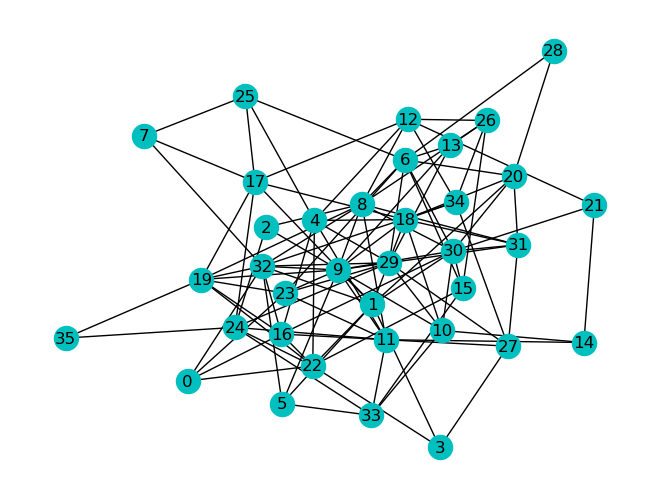

In [13]:
new_labels = dict(list(zip(G.nodes(),r)))
nx.draw(G, labels=new_labels,node_color='c')